In [17]:
# importing PyTorch library as 't' for convenience
!pip install torch

import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

!pip install category_encoders
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

!pip install -U imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler


warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('mhealth.csv')
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [5]:
data.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object

In [ ]:
print(data.shape)

(999999, 14)


In [ ]:
pd.set_option('display.max_rows', None)
missing_value_counts = data.isnull().sum()
missing_value_counts

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [21]:
import plotly.express as px

# Compute the count of each class in the 'target' column
counts = data['Activity'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Activity"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Activity'
    ),
    title=dict(
        text='Distribution of Classes in "Activity"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

In [20]:
# Compute the count of unique 'Activity' values for each 'subject_id'
counts = data.groupby('subject')['Activity'].nunique().reset_index(name='count')

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the 'subject_id' labels, and 'values' are the counts for each 'subject_id'
fig = px.pie(
    counts,
    names='subject',
    values='count',
    color='subject',
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Unique Activities by Subject ID'
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Unique Activities per Subject ID'
    ),
    title=dict(
        text='Distribution of Unique Activities by Subject ID',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

In [9]:
df_without_subjects = data.iloc[:, :-1]
df_without_subjects.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0


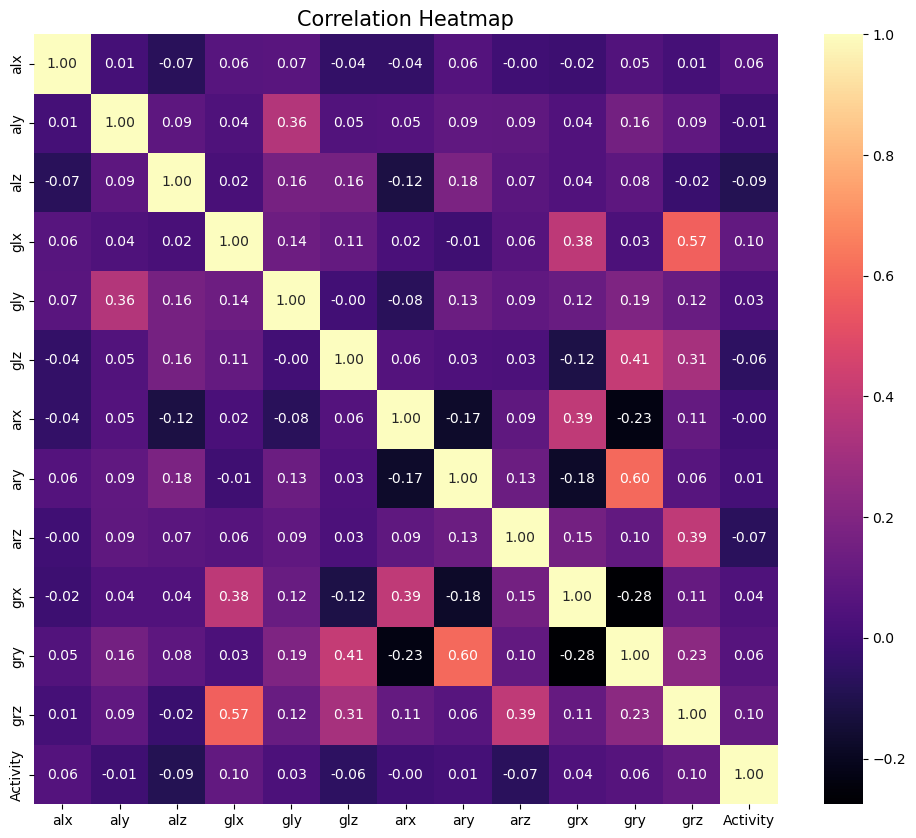

In [10]:
# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = df_without_subjects.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = data.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.33, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((642110, 14), (357889, 14))

In [ ]:
train_df['subject'].unique()

array(['subject1', 'subject9', 'subject3', 'subject5', 'subject4',
       'subject7'], dtype=object)

In [ ]:
train_df['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [ ]:
test_df['subject'].unique()

array(['subject8', 'subject2', 'subject6'], dtype=object)

In [ ]:
test_df['Activity'].unique()

array([ 0,  1,  3,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
numerical_columns = train_df.select_dtypes(include=['float64']).columns.tolist()

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head(n=200)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.260284,-0.008963,0.284976,0.292652,-0.642182,-1.053826,-1.128355,0.230450,-0.676806,-0.310249,-1.021454,-0.512038,0,subject1
1,0.312098,0.037282,0.294980,0.254863,-0.636432,-1.046685,-1.123735,0.276412,-0.719443,-0.310249,-1.021454,-0.512038,0,subject1
2,0.317466,0.022725,0.294461,0.254863,-0.636432,-1.046685,-1.098577,0.283992,-0.653961,-0.310249,-1.021454,-0.512038,0,subject1
3,0.259389,0.056373,0.269822,0.254863,-0.636432,-1.046685,-1.123818,0.277034,-0.630118,-0.324322,-1.017632,-0.527888,0,subject1
4,0.319690,0.066471,0.300083,0.254863,-0.636432,-1.046685,-1.138851,0.307355,-0.619789,-0.324322,-1.017632,-0.527888,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.104639,0.018755,0.176990,0.171746,-0.590522,-1.125232,-1.228926,0.441947,-0.712773,-0.384167,-1.013992,-0.539774,0,subject1
196,0.100166,-0.022173,0.200887,0.167969,-0.550362,-1.125232,-1.209067,0.427392,-0.759828,-0.384167,-1.013992,-0.539774,0,subject1
197,0.133447,0.021328,0.187110,0.167969,-0.550362,-1.125232,-1.203891,0.434776,-0.721413,-0.384167,-1.013992,-0.539774,0,subject1
198,0.160133,-0.009968,0.207685,0.167969,-0.550362,-1.125232,-1.155884,0.439919,-0.748091,-0.363040,-0.972804,-0.567512,0,subject1


In [5]:
sensor_columns = ['alx','aly','alz','glx','gly','glz','arx','ary','arz','grx','gry','grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]  
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df, sequence_length=100)
X_test, y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((6421, 100, 12), (6421,), (3578, 100, 12), (3578,))

In [6]:
from collections import Counter

# Calculate class distribution
class_distribution = Counter(y_train)

# Print the class distribution
print(class_distribution)


Counter({0: 4639, 1: 184, 2: 164, 6: 156, 4: 154, 7: 154, 9: 154, 10: 154, 8: 153, 11: 153, 5: 153, 3: 152, 12: 51})


In [7]:
from sklearn.utils import resample

counts = [class_distribution.get(i, 0) for i in range(max(class_distribution.keys()) + 1)]
target_count = np.max(counts)  # Using the max count of Activity 0

# Separate sequences for "Activity 0"
act_0_seq = X_train[y_train == 0]
act_1_seq = X_train[y_train == 1]
act_2_seq = X_train[y_train == 2]
act_3_seq = X_train[y_train == 3]
act_4_seq = X_train[y_train == 4]
act_5_seq = X_train[y_train == 5]
act_6_seq = X_train[y_train == 6]
act_7_seq = X_train[y_train == 7]
act_8_seq = X_train[y_train == 8]
act_9_seq = X_train[y_train == 9]
act_10_seq = X_train[y_train == 10]
act_11_seq = X_train[y_train == 11]
act_12_seq = X_train[y_train == 12]

other_act_seq = X_train[y_train != 0]

# Also separate the labels
act_0_labels = y_train[y_train == 0]
act_1_labels = y_train[y_train == 1]
act_2_labels = y_train[y_train == 2]
act_3_labels = y_train[y_train == 3]
act_4_labels = y_train[y_train == 4]
act_5_labels = y_train[y_train == 5]
act_6_labels = y_train[y_train == 6]
act_7_labels = y_train[y_train == 7]
act_8_labels = y_train[y_train == 8]
act_9_labels = y_train[y_train == 9]
act_10_labels = y_train[y_train == 10]
act_11_labels = y_train[y_train == 11]
act_12_labels = y_train[y_train == 12]

other_act_labels = y_train[y_train != 0]

# Perform oversampling for all Activities not = 0

act_1_seq_bal = resample(act_1_seq, replace=True, n_samples=int(target_count), random_state=42)
act_2_seq_bal = resample(act_2_seq, replace=True, n_samples=int(target_count), random_state=42)
act_3_seq_bal = resample(act_3_seq, replace=True, n_samples=int(target_count), random_state=42)
act_4_seq_bal = resample(act_4_seq, replace=True, n_samples=int(target_count), random_state=42)
act_5_seq_bal = resample(act_5_seq, replace=True, n_samples=int(target_count), random_state=42)
act_6_seq_bal = resample(act_6_seq, replace=True, n_samples=int(target_count), random_state=42)
act_7_seq_bal = resample(act_7_seq, replace=True, n_samples=int(target_count), random_state=42)
act_8_seq_bal = resample(act_8_seq, replace=True, n_samples=int(target_count), random_state=42)
act_9_seq_bal = resample(act_9_seq, replace=True, n_samples=int(target_count), random_state=42)
act_10_seq_bal = resample(act_10_seq, replace=True, n_samples=int(target_count), random_state=42)
act_11_seq_bal = resample(act_11_seq, replace=True, n_samples=int(target_count), random_state=42)
act_12_seq_bal = resample(act_12_seq, replace=True, n_samples=int(target_count), random_state=42)


act_0_labels_bal = np.zeros(int(target_count))
act_1_labels_bal = np.ones(int(target_count))
act_2_labels_bal = 2*np.ones(int(target_count))
act_3_labels_bal = 3*np.ones(int(target_count))
act_4_labels_bal = 4*np.ones(int(target_count))
act_5_labels_bal = 5*np.ones(int(target_count))
act_6_labels_bal = 6*np.ones(int(target_count))
act_7_labels_bal = 7*np.ones(int(target_count))
act_8_labels_bal = 8*np.ones(int(target_count))
act_9_labels_bal = 9*np.ones(int(target_count))
act_10_labels_bal = 10*np.ones(int(target_count))
act_11_labels_bal = 11*np.ones(int(target_count))
act_12_labels_bal = 12*np.ones(int(target_count))



# Combine the undersampled data with the other activities
X_train_bal = np.concatenate((act_0_seq, act_1_seq_bal, act_2_seq_bal,act_3_seq_bal,act_4_seq_bal, act_5_seq_bal, act_6_seq_bal, act_7_seq_bal, act_8_seq_bal, act_9_seq_bal, act_10_seq_bal, act_11_seq_bal, act_12_seq_bal))
y_train_bal = np.concatenate((act_0_labels, act_1_labels_bal, act_2_labels_bal, act_3_labels_bal, act_4_labels_bal, act_5_labels_bal, act_6_labels_bal, act_7_labels_bal, act_8_labels_bal, act_9_labels_bal, act_10_labels_bal,act_11_labels_bal, act_12_labels_bal))

# Check the new distribution
unique_balanced, counts_balanced = np.unique(y_train_bal, return_counts=True)
new_class_distribution = dict(zip(unique_balanced, counts_balanced))
print(new_class_distribution)

# Validate the shapes
print(X_train_bal.shape, y_train_bal.shape)

{0.0: 4639, 1.0: 4639, 2.0: 4639, 3.0: 4639, 4.0: 4639, 5.0: 4639, 6.0: 4639, 7.0: 4639, 8.0: 4639, 9.0: 4639, 10.0: 4639, 11.0: 4639, 12.0: 4639}
(60307, 100, 12) (60307,)


# KNN

In [8]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 20
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/20 ---> Train Accuracy: 60.81549405541645%, Validation Accuracy: 13.471212968138625%
Epoch 1/20 ---> Train Accuracy: 76.08072031439137%, Validation Accuracy: 16.433761878144214%
Epoch 2/20 ---> Train Accuracy: 81.65387102658066%, Validation Accuracy: 24.538848518725544%
Epoch 3/20 ---> Train Accuracy: 70.40476229956721%, Validation Accuracy: 27.249860257126887%
Epoch 4/20 ---> Train Accuracy: 73.81730147412406%, Validation Accuracy: 13.83454443823365%
Epoch 5/20 ---> Train Accuracy: 82.23589301407797%, Validation Accuracy: 25.768585802124093%
Epoch 6/20 ---> Train Accuracy: 80.40525975425739%, Validation Accuracy: 22.13527110117384%
Epoch 7/20 ---> Train Accuracy: 78.34413915465866%, Validation Accuracy: 22.191168250419228%
Epoch 8/20 ---> Train Accuracy: 87.69462914752847%, Validation Accuracy: 26.27166014533259%
Epoch 9/20 ---> Train Accuracy: 79.36392126950437%, Validation Accuracy: 22.72219116825042%
Epoch 10/20 ---> Train Accuracy: 87.44092725554248%, Validation Accuracy: 

In [9]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 20
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    #optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
    optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        loss = loss_fn(out, Y) + landa * l2_term
        # loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/20 ---> Train Accuracy: 72.988210323843%, Validation Accuracy: 14.728898826159865%
Epoch 1/20 ---> Train Accuracy: 66.63737211269007%, Validation Accuracy: 13.024035774175516%
Epoch 2/20 ---> Train Accuracy: 37.65400368116471%, Validation Accuracy: 7.266629401900503%
Epoch 3/20 ---> Train Accuracy: 54.7150413716484%, Validation Accuracy: 13.750698714365567%
Epoch 4/20 ---> Train Accuracy: 78.15013182549289%, Validation Accuracy: 19.536053661263274%
Epoch 5/20 ---> Train Accuracy: 79.90448869948762%, Validation Accuracy: 23.169368362213525%
Epoch 6/20 ---> Train Accuracy: 85.11615567015437%, Validation Accuracy: 30.799329234209054%
Epoch 7/20 ---> Train Accuracy: 75.94972391264696%, Validation Accuracy: 22.47065399664617%
Epoch 8/20 ---> Train Accuracy: 85.23886116039597%, Validation Accuracy: 27.501397428731135%
Epoch 9/20 ---> Train Accuracy: 75.05430547034341%, Validation Accuracy: 20.57015092230296%
Epoch 10/20 ---> Train Accuracy: 83.3286351501484%, Validation Accuracy: 26.

# LSTM

In [10]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 20
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/20 ---> Train Accuracy: 75.8120947817003%, Validation Accuracy: 23.448854108440468%
Epoch 1/20 ---> Train Accuracy: 79.83152867826288%, Validation Accuracy: 22.163219675796533%
Epoch 2/20 ---> Train Accuracy: 88.65803306415508%, Validation Accuracy: 33.9854667411962%
Epoch 3/20 ---> Train Accuracy: 94.39202745949889%, Validation Accuracy: 44.6618222470654%
Epoch 4/20 ---> Train Accuracy: 92.79022335715588%, Validation Accuracy: 44.99720514253773%
Epoch 5/20 ---> Train Accuracy: 94.65899480988939%, Validation Accuracy: 47.54052543320291%
Epoch 6/20 ---> Train Accuracy: 92.67746696071767%, Validation Accuracy: 49.91615427613192%
Epoch 7/20 ---> Train Accuracy: 95.98388246803853%, Validation Accuracy: 53.80100614868642%
Epoch 8/20 ---> Train Accuracy: 90.69593911154593%, Validation Accuracy: 43.068753493571826%
Epoch 9/20 ---> Train Accuracy: 92.70897242442834%, Validation Accuracy: 47.42873113471213%
Epoch 10/20 ---> Train Accuracy: 88.87193858092759%, Validation Accuracy: 45.304

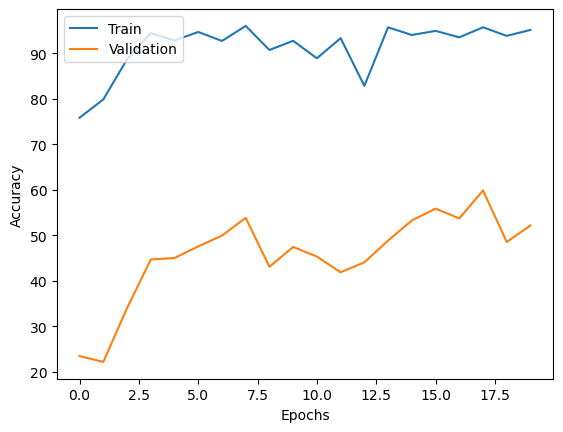

In [11]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [12]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = 12  # Number of features in each timestep
hidden_size = 256  # Number of hidden units in RNN
num_classes = len(np.unique(y_train_bal))  # Number of unique classes
epochs = 20
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_bal, dtype=t.float32), t.tensor(y_train_bal, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
#optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        loss = loss_fn(out, Y) + landa * l2_term
        #loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/20 ---> Train Accuracy: 73.64485051486561%, Validation Accuracy: 16.40581330352152%
Epoch 1/20 ---> Train Accuracy: 65.43353176248196%, Validation Accuracy: 11.961989938513137%
Epoch 2/20 ---> Train Accuracy: 74.08095245991345%, Validation Accuracy: 20.09502515371716%
Epoch 3/20 ---> Train Accuracy: 80.43842340026862%, Validation Accuracy: 30.74343208496367%
Epoch 4/20 ---> Train Accuracy: 80.66891074004675%, Validation Accuracy: 30.04471771939631%
Epoch 5/20 ---> Train Accuracy: 86.29843965045517%, Validation Accuracy: 37.64673001676915%
Epoch 6/20 ---> Train Accuracy: 86.46094151591026%, Validation Accuracy: 35.326998323085526%
Epoch 7/20 ---> Train Accuracy: 88.8188767473096%, Validation Accuracy: 43.48798211291224%
Epoch 8/20 ---> Train Accuracy: 91.95615765997314%, Validation Accuracy: 45.500279485746226%
Epoch 9/20 ---> Train Accuracy: 89.08418591539954%, Validation Accuracy: 46.22694242593628%
Epoch 10/20 ---> Train Accuracy: 91.75883396620624%, Validation Accuracy: 44.6